# 教學目標:
    
回顧 CNN 網路

# 範例說明:
    
使用 keras 預載的模型

使用 keras VGG16 預訓練的權重

了解預測後的結果輸出

# 作業:

    回答 Q&A

ref: [Keras —— 基于Vgg16模型（含全连接层）的图片识别](https://blog.csdn.net/starter_____/article/details/79340715)
    [](https://github.com/Zheng-Wenkai/Keras_Demo)

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

#載入預訓練模型
#model = VGG16(weights='imagenet', include_top=False)
model = VGG16(weights='imagenet')

# VGG 現存模型要找到一張名為elephant.jpg做處理的預設路徑
img_path = 'elephant.jpg'
#載入影像
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Using TensorFlow backend.


In [2]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

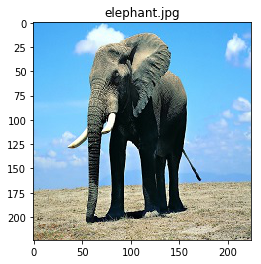

    1 - (n01871265 , tusker              , 0.7715481)
    2 - (n02504458 , African_elephant    , 0.1593091)
    3 - (n02504013 , Indian_elephant     , 0.0691420)
    4 - (n02437312 , Arabian_camel       , 0.0000007)
    5 - (n01704323 , triceratops         , 0.0000001)


In [3]:
import os
from keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

fname = os.path.basename(img_path)
# 顯示原圖
plt.imshow(img)
plt.title(fname)
plt.show()

#執行預測
features = model.predict(x)
#print(features)

# decode_predictions 輸出5個最高概率：(類別, 語義概念, 預測概率)
# print('Predicted:', decode_predictions(features, top=5)[0])
class_rank = decode_predictions(features, top=5)[0]
for (i, (class_id, label_name, class_prob)) in enumerate(class_rank):
    print(f"{str(i+1):>5s} - ({class_id:10s}, {label_name:20s}, {class_prob:.7f})")

# 問題:

為什麼在CNNs中激活函數選用ReLU，而不用sigmoid或tanh函數？
> 1. CNN/DNN 網路引入非線性激活函數，讓串接之各層不再是單純線性組合，使之可以逼近任意函數  
> 2. 解決 sigmoid, tanh 函數兩側飽和導致之梯度消失問題  
> 3. 使部分神經元的輸出為0，可以讓神經網路變得稀疏，緩解過度擬合的問題  
> 4. 節省計算量, 只需要判斷輸入是否大於0，不用指數運算。  

> ref: [深度學習：使用激勵函數的目的、如何選擇激勵函數 Deep Learning ](https://mropengate.blogspot.com/2017/02/deep-learning-role-of-activation.html)  

為何img_path = 'elephant.jpg'
> 此變數用來指定需做預測處理的圖像預設路徑